<a href="https://colab.research.google.com/github/achabbak/test/blob/master/T5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U transformers
!pip install -U datasets
!pip install tensorboard
!pip install sentencepiece
!pip install accelerate
!pip install datasets
!pip install --upgrade transformers datasets accelerate torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 22.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.48.3
    Uninstalling transformers-4.48.3:
      Successfully uninstalled transformers-4.48.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install rouge_score

In [ ]:
%pip install --upgrade pip
%pip install --disable-pip-version-check \
    torch==1.13.1 \
    torchdata==0.5.1 --quiet

%pip install \
    transformers==4.27.2 \
    datasets==2.11.0 \
    evaluate==0.4.0 \
    rouge_score==0.1.2 \
    loralib==0.1.1 \
    peft==0.3.0 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.18 requires torch<2.6,>=1.10, but you have torch 2.6.0 which is incompatible.
ERROR: Ignored the following yanked versions: 0.3.0a0
ERROR: Could not find a version that satisfies the requirement torchdata==0.5.1 (from versions: 0.3.0a1, 0.3.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0)
ERROR: No matching distribution found for torchdata==0.5.1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.1 MB/s eta 0:00:00
ERROR: pip's dependency resolv

In [ ]:
import os
os._exit(00)

1.Importation des Bibliothèques et Configuration Initiale

In [ ]:
# Importer les bibliothèques nécessaires
#from google.colab import drive
import shutil
import numpy as np

import matplotlib.pyplot as plt
import os
import evaluate
import torch
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import (
    T5Tokenizer,
    T5ForConditionalGeneration,
    TrainingArguments,
    Trainer
)
from datasets import Dataset, DatasetDict
from datasets import load_dataset

 2. Chargement et Préparation des Données

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/Colab Notebooks/pfe/datasets/T52/T5medical_reports.csv"
df1 = pd.read_csv(data_path)
df=df1.head(50)

In [ ]:
# Diviser les données en ensembles d'entraînement et de validation
df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)


In [ ]:
# Définir les chemins des fichiers de sortie dans le même dossier
train_file = os.path.join("/content/drive/MyDrive/Colab Notebooks/pfe/datasets/T52", "train.csv")
valid_file = os.path.join("/content/drive/MyDrive/Colab Notebooks/pfe/datasets/T52", "valid.csv")

In [ ]:
# Enregistrer les ensembles dans les fichiers CSV
df_train.to_csv(train_file, index=False)
df_val.to_csv(valid_file, index=False)

3. Chargement des Datasets et Prétraitement

In [ ]:
# Charger les fichiers CSV en tant que Dataset
dataset_train = Dataset.from_pandas(pd.read_csv(train_file))
dataset_valid = Dataset.from_pandas(pd.read_csv(valid_file))

In [ ]:
print(dataset_train[0])

{'Texte Erroné': 'Mise en place d’un champ troué englobant les cils, mise d’un blépharostat', 'Texte Corrigé': 'Mise en place d’un champ troué englobant les cils, mise d’un blépharostat'}


In [ ]:
# Définir les constantes
MODEL = 't5-small'
BATCH_SIZE = 4
EPOCHS = 3
MAX_LENGTH = 512
NUM_PROCS = 1

In [ ]:

# Initialiser le tokenizer avec un modèle et une longueur maximale définie
tokenizer = T5Tokenizer.from_pretrained(MODEL, model_max_length=MAX_LENGTH)

def preprocess_function(examples):
    # Générer les inputs à partir des rapports erronés
    inputs = [f"corriger : {erroneous}" for erroneous in examples['Texte Erroné']]

    # Tokenisation des inputs (rapports erronés)
    model_inputs = tokenizer(
        inputs,
        max_length=MAX_LENGTH,
        truncation=True,
        padding='max_length'
    )

    # Récupérer les rapports corrigés
    cleaned_tag = examples['Texte Corrigé']

    # Tokenisation des labels (rapports corrigés)
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            cleaned_tag,
            max_length=MAX_LENGTH,
            truncation=True,
            padding='max_length'
        )

    # Ajouter les labels aux inputs pour l'entraînement du modèle
    model_inputs["labels"] = labels["input_ids"]

    return model_inputs


In [ ]:
# Appliquer la fonction de prétraitement aux datasets
tokenized_train = dataset_train.map(
    preprocess_function,
    batched=True,
    num_proc=NUM_PROCS # Utiliser un seul processus
)
tokenized_valid = dataset_valid.map(
    preprocess_function,
    batched=True,
    num_proc=NUM_PROCS  # Utiliser un seul processus
)

Map:   0%|          | 0/40 [00:00<?, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

4. Initialisation du Modèle et Arguments d'Entraînement

In [ ]:
# Initialiser le modèle T5
model = T5ForConditionalGeneration.from_pretrained(MODEL)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Drop

In [ ]:
from transformers import EvalPrediction
# Charger la métrique accuracy
accuracy_metric = evaluate.load("accuracy")

# Fonction pour calculer l'accuracy
def compute_metrics(pred: EvalPrediction):
    preds = pred.predictions
    labels = pred.label_ids

    # Vérifier si preds et labels sont sous forme de logits et les convertir en entiers
    if isinstance(preds, tuple):
        preds = preds[0]  # On prend la première sortie si c'est un tuple

    # Convertir les logits en tokens (si nécessaire)
    if preds.ndim > 2:  # (batch, seq_length, vocab_size)
        preds = np.argmax(preds, axis=-1)  # Prendre les tokens avec la probabilité max

    # S'assurer que les données sont des listes d'entiers
    preds = preds.tolist()
    labels = labels.tolist()

    # Décoder les séquences de tokens en texte
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Supprimer les espaces inutiles
    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [label.strip() for label in decoded_labels]

    # Calculer l'accuracy
    accuracy = accuracy_metric.compute(predictions=decoded_preds, references=decoded_labels)

    return {"accuracy": accuracy["accuracy"]}


In [ ]:

# Définir les arguments d'entraînement
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Colab Notebooks/pfe/datasets/T52",  # Dossier pour sauvegarder les checkpoints du modèle
    num_train_epochs=EPOCHS,  # Nombre total d'époques d'entraînement
    per_device_train_batch_size=BATCH_SIZE,  # Taille du lot d'entraînement par GPU/CPU
    per_device_eval_batch_size=BATCH_SIZE,  # Taille du lot d'évaluation par GPU/CPU
    warmup_steps=500,  # Nombre de pas pour l'échauffement du taux d'apprentissage
    weight_decay=0.01,  # Coefficient de régularisation L2 pour éviter le sur-apprentissage
    logging_dir="/content/drive/MyDrive/Colab Notebooks/pfe/datasets/T52/logs",  # Dossier pour stocker les logs de TensorBoard
    logging_steps=10,  # Fréquence (en pas) d'enregistrement des logs
    evaluation_strategy='steps',  # Fréquence d'évaluation (ici, tous les `eval_steps` pas)
    save_steps=20,  # Sauvegarde un checkpoint tous les 20 pas
    eval_steps=10,  # Effectue une évaluation tous les 10 pas
    load_best_model_at_end=True,  # Charge le meilleur modèle à la fin de l'entraînement
    logging_first_step=True,  # Enregistre les logs dès le premier pas
    save_total_limit=3,  # Conserve uniquement les 3 derniers checkpoints pour économiser de l’espace
    report_to='tensorboard',  # Enregistre les logs pour TensorBoard
    learning_rate=2e-5,  # Taux d'apprentissage initial
    dataloader_num_workers=0  # Nombre de threads pour le chargement des données (0 pour éviter les problèmes sur Colab)

)


5. Entraînement du Modèle

In [ ]:
# Entraîner le modèle
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_valid,
    compute_metrics=compute_metrics
)




In [ ]:
history=trainer.train()

Step,Training Loss,Validation Loss


ValueError: invalid literal for int() with base 10: 'Corsinfection cutanée à la Betaétadine des culs de sacs conjonctivaux (2fois) cor cor cor cor cor cor cor cor cor cor cor cor cor cor cor cor cor cor cor cor cor cor cor cor cor cor cor cor cor cor c

In [ ]:
# Après l'entraînement
print(trainer.state.log_history)


In [ ]:
trainer.evaluate()

{'eval_loss': 14.806402206420898,
 'eval_runtime': 16.2479,
 'eval_samples_per_second': 0.615,
 'eval_steps_per_second': 0.123,
 'epoch': 3.0}

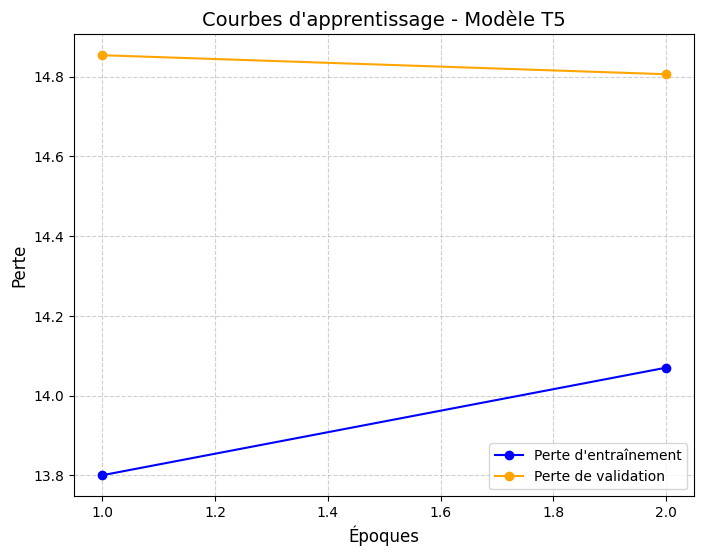

In [ ]:

# Extraire les pertes d'entraînement et de validation
train_loss = [log["loss"] for log in trainer.state.log_history if "loss" in log]
eval_loss = [log["eval_loss"] for log in trainer.state.log_history if "eval_loss" in log]

# Trouver la plus petite taille commune
min_len = min(len(train_loss), len(eval_loss))

# Ajuster les longueurs
train_loss = train_loss[:min_len]  # Tronquer train_loss
eval_loss = eval_loss[:min_len]    # Tronquer eval_loss

# Définir les époques
epochs = list(range(1, min_len + 1))

# Tracer le graphique
plt.figure(figsize=(8, 6))

plt.plot(epochs, train_loss, label="Perte d'entraînement", color='blue', marker='o')
plt.plot(epochs, eval_loss, label="Perte de validation", color='orange', marker='o')

# Ajouter les labels et titre
plt.xlabel("Époques", fontsize=12)
plt.ylabel("Perte", fontsize=12)
plt.title("Courbes d'apprentissage - Modèle T5", fontsize=14)

# Ajouter une grille
plt.grid(True, linestyle="--", alpha=0.6)

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


In [ ]:
import tensorflow as tf

# Remplace par le chemin de ton fichier event.out
log_dir = "/content/drive/MyDrive/Colab Notebooks/pfe/datasets/T52/logs"

# Initialiser les listes pour stocker les données
steps = []
accuracy = []

# Lire le fichier event.out avec TensorFlow
for event in tf.compat.v1.train.summary_iterator(log_dir):
    for value in event.summary.value:
        if "accuracy" in value.tag:  # Modifier ce tag si nécessaire
            steps.append(event.step)
            accuracy.append(value.simple_value)

# Trouver la valeur maximale d'accuracy et l'étape correspondante
if accuracy:
    max_accuracy = max(accuracy)
    max_step = steps[accuracy.index(max_accuracy)]
    print(f"Valeur maximale de l'accuracy: {max_accuracy:.4f} à l'étape {max_step}")
else:
    print("Aucune valeur d'accuracy trouvée dans le fichier.")


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


NotFoundError: /content/drive/MyDrive/Colab Notebooks/pfe/datasets/T52/logs/events.out.tfevents.1740138947.e306733fbf33.14442; No such file or directory

In [ ]:
# Sauvegarder le tokenizer
tokenizer.save_pretrained("/content/drive/MyDrive/Colab Notebooks/pfe/datasets/T52/T5_medical")
# Sauvegarde du modèle
model.save_pretrained("/content/drive/MyDrive/Colab Notebooks/pfe/datasets/T52/T5_medical")

('/content/drive/MyDrive/Colab Notebooks/pfe/datasets/T52/tokenizer/tokenizer_config.json',
 '/content/drive/MyDrive/Colab Notebooks/pfe/datasets/T52/tokenizer/special_tokens_map.json',
 '/content/drive/MyDrive/Colab Notebooks/pfe/datasets/T52/tokenizer/spiece.model',
 '/content/drive/MyDrive/Colab Notebooks/pfe/datasets/T52/tokenizer/added_tokens.json')

In [ ]:
# Copier les résultats vers Google Drive
#source_folder = f'./{OUT_DIR}'
#target_folder = f'/content/drive/My Drive/PEFT_2/{OUT_DIR}'
#shutil.copytree(source_folder , target_folder)

In [ ]:

# Charger le modèle et le tokenizer sauvegardés
model_path = '/content/drive/MyDrive/Colab Notebooks/pfe/datasets/T52/T5_medical'
model = T5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = T5Tokenizer.from_pretrained(model_path)

def do_correction(text, model, tokenizer):
    input_text = f" le rapport erroné : {text}"
    inputs = tokenizer.encode(
        input_text,
        return_tensors='pt',
        max_length=MAX_LENGTH,
        padding='max_length',
        truncation=True
    )

    # Générer la rapport corrigé
    corrected_ids = model.generate(
        inputs,
        max_length=MAX_LENGTH,
        num_beams=5,
        early_stopping=True
    )

    # Décoder le rapport corrigée
    corrected_sentence = tokenizer.decode(
        corrected_ids[0],
        skip_special_tokens=True
    )
    return corrected_sentence

text = """
Le patient présente une dysfonctionnaire coronarienne et une lymphadénopatie abdominale sévère.Une résection hépatorénale est recommandée pour le traitement du tableau clinique
"""

print(do_correction(text, model, tokenizer))


Le patient présente une dysfonctionnaire coronarienne et une lymphadénopatie abdominale sévère.Une résection hépatorénale est recommandée pour le traitement du tableau clinique clinique.


In [ ]:

# Sauvegarde du modèle
trainer.save_model("/content/drive/MyDrive/Colab Notebooks/pfe/datasets/T52/T5_medical")